## CMPE547 - HW2

### Question 1 : Visualize the given data on a scatter plot

In [186]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [187]:
x1=[];
x2=[];

# Get the data
with open("data.txt") as f:
    for line in f:
        tokens = line.split()
        x1.append(tokens[0])
        x2.append(tokens[1])
   
x1= [float(x) for x in x1] # convert x1 into a list of floats from string
x2= [float(x) for x in x2] # convert x2 into a list of floats from string

The provided dataset has 100 $(x_1, x_2)$ tuples. Below is the scatterplot of the data.

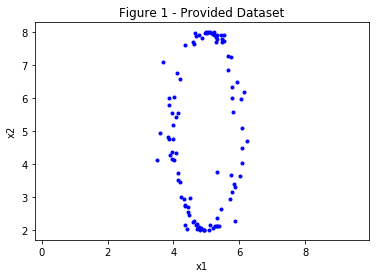

In [188]:
plt.axis('equal') 
plt.plot(x1,x2,'b.')
plt.xlabel('x1')
plt.ylabel('x2')
pylab.title('Figure 1 - Provided Dataset');


### Question 2 : Propose a generative model

It is clear that the shape looks like an ellipse with a vertical major axis centered at $(5,5)$. While $x_1$ values mostly lie in the range $[4,6]$, $x_2$ values are between $[2,8]$. Therefore, the $a$ value in our ellipse equation becomes $\dfrac{(6-4)}{2} = 1$ and the $b$ value becomes $\dfrac{(8-2)}{2} = 3$. This yields the following relationship between $x_1$ and $x_2$:
$$ \dfrac{(x_1-5)^2}{1^2} + \dfrac{(x_2-5)^2}{3^2} = 1 $$

Furthermore, the points are scattered more or less uniformly along the $x_1$ dimension.
Thus, our generative model becomes:


$$x_1 \sim \mathcal{U}(4,6)$$


$$x_2 = 5 \pm \sqrt{9-9*(x_1-5)^2}$$

The noise parameters will be included later.

### Question 3 : Implement the model and sample data

We can implement the generative model as follows:

In [189]:
# SYNTHETIC DATA GENERATION WITH NO NOISE
sample_size = 100

sign = np.ceil(np.random.uniform(0,1,sample_size) - 0.5) ## this is 0 or 1

x1_sampled = np.random.uniform(4,6,sample_size) ## x1 drawn uniformly between [4,6]
x2_sampled = 5 + (sign-1)*np.sqrt(9-9*(x1_sampled-5)**2) + (sign)*np.sqrt(9-9*(x1_sampled-5)**2) # if sign =0, subtraction, if sign = 1, addition

#print("x1: " , x1);
#print("x2: " , x2);

At this point, we have sampled 100 $(x1,x2)$ tuples generated from the model we proposed. It's time to draw them on a scatter plot.

### Question 4 : Visualize the synthetic data and look for similarity

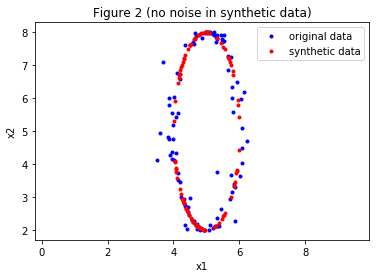

In [190]:
plt.axis('equal')
plt.plot(x1,x2,"b.", label='original data')
plt.plot(x1_sampled,x2_sampled,"r.", label='synthetic data')
plt.xlabel('x1')
plt.ylabel('x2')
pylab.title('Figure 2 (no noise in synthetic data)')
pylab.legend(loc='upper right');



As seen in the figure above, the synthetic data and the original data are kind of similar. Now, since there exists noise in real-life data, let's add some to our synthetic data and see if they look more similar. Noise to $x_1$ can be picked using the standard Normal distribution since there exist some outliers, while it is better to use a standard uniform distribution for noise to $x_2$ as there are rarely any outliers.

The complete generative model is:

$$x_1noise \sim sign_1* \mathcal{N}(0,1) * n_1 $$
$$x_2noise \sim sign_2* \mathcal{U}(0,1)*n_2 $$

where $n_1, n_2$ are constants and $sign_1, sign_2$ are $1$ or $-1$ with equal probability


$$x \sim \mathcal{U}(4,6)$$

$$x_1 = x + x_1noise $$

$$x_2 = 5 \pm \sqrt{9-9*(x-5)^2} + x_2noise $$

In [200]:
# SYNTHETIC DATA GENERATION WITH NOISE
sample_size = 100
x1_noise_coefficient = 0.12
x2_noise_coefficient = 0.08

x1_noise = np.sign(np.random.rand(sample_size))*np.random.randn(sample_size)*x1_noise_coefficient # noise x1 from standard normal distribution, as there are some outliers.
x2_noise = np.sign(np.random.rand(sample_size))*np.random.rand(sample_size)*x2_noise_coefficient # noise x2 from standard uniform distribution, as there are rarely any outliers.
sign = np.ceil(np.random.uniform(0,1,sample_size) - 0.5) ## this is 0 or 1

x = np.random.uniform(4,6,sample_size) ## x drawn uniformly between [4,6]
x1_sampled = x + x1_noise
x2_sampled = 5 + (sign-1)*np.sqrt(9-9*(x-5)**2) + (sign)*np.sqrt(9-9*(x-5)**2) # if sign =0, subtraction, if sign = 1, addition
x2_sampled = x2_sampled + x2_noise

#print("x1: " , x1);
#print("x2: " , x2);

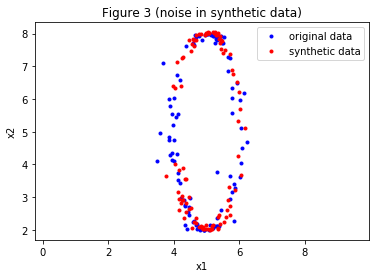

In [201]:
plt.axis('equal')
plt.plot(x1,x2,"b.", label='original data')
plt.plot(x1_sampled,x2_sampled,"r.", label='synthetic data')
plt.xlabel('x1')
plt.ylabel('x2')
pylab.title('Figure 3 (noise in synthetic data)')
pylab.legend(loc='upper right');

### Question 5 : Discuss methods of assessing similarity between datasets

Voila! Our synthetic data looks much similar to the original data after the addition of noise. We can tell that just by observing Figure 3. However, to be more scientific, we can use a similarity measure for assessment. 

In statistical terms, a very good way to see if two datasets are similar is comparing the correlation between the variables, which are $x_1$ and $x_2$ in our problem. Correlation indicates how $x_2$ changes when $x_1$ changes. It tells us about the relationship between $x_1$ and $x_2$. On top of that, we can calculate the mean along each dimension to be sure whether the points are in similar ranges. Let's get to the math!

In [202]:
x1_sampled= [float(x) for x in x1_sampled] # convert x1_sampled into a list of floats from string
x2_sampled= [float(x) for x in x2_sampled] # convert x2_sampled into a list of floats from string

print("Correlation matrix for the original data:") 
print(np.corrcoef(x1,x2))
print ("\n")
print("Correlation matrix for the synthetic data:") 
print(np.corrcoef(x1_sampled,x2_sampled))
print ("\n")
print("x1 mean for the original data: ",np.mean(x1)) 
print("x1 mean for the synthetic data: ",np.mean(x1_sampled))
print("x2 mean for the  original data: ",np.mean(x2))
print("x2 mean for the synthetic data: ",np.mean(x2_sampled))

Correlation matrix for the original data:
[[ 1.          0.10921497]
 [ 0.10921497  1.        ]]


Correlation matrix for the synthetic data:
[[ 1.          0.09674954]
 [ 0.09674954  1.        ]]


x1 mean for the original data:  4.89903
x1 mean for the synthetic data:  4.97808518278
x2 mean for the  original data:  4.85242
x2 mean for the synthetic data:  4.89714265987


The correlation coefficients are almost the same. This indicates that our generative model got the relationship between $x_1$ and $x_2$ right. In addition, the means are also very close, showing the fact that the points are scattered around very similar ranges. Although similarity is always a subjective matter, I can say that our generative model did a pretty good job at creating a perhaps indistingishable set of points from the original ones!
